In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
df=pd.read_csv('loan_approval_dataset.csv')

In [3]:
df

,Loan_id,No_of_dependents,Education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Loan_id                   4269 non-null   int64 
 1   No_of_dependents          4269 non-null   int64 
 2   Education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.isnull().sum()

Loan_id                     0
No_of_dependents            0
Education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [6]:
df.describe()

,Loan_id,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df=df.drop(columns='Loan_id', axis=1)
df.head()

,No_of_dependents,Education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
df1 =df.copy()

In [9]:
df.Education.value_counts()

Education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [10]:
df.self_employed.value_counts()

self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [11]:
df.loan_status.value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [12]:
label_encoder = preprocessing.LabelEncoder() 
df['Education']= label_encoder.fit_transform(df['Education'])
df['Education'].unique()

array([0, 1])

In [13]:
label_encoder = preprocessing.LabelEncoder() 
df['self_employed']= label_encoder.fit_transform(df['self_employed'])
df['self_employed'].unique()

array([0, 1])

In [14]:
label_encoder = preprocessing.LabelEncoder() 
df['loan_status']= label_encoder.fit_transform(df['loan_status'])
df['loan_status'].unique()

array([0, 1])

In [15]:
x=df.iloc[:,:12]
x

,No_of_dependents,Education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [16]:
y=df.iloc[:,[-1]]

In [17]:
y

,loan_status
0,0
1,1
2,1
3,1
4,1
...,...
4264,1
4265,0
4266,1
4267,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2, test_size=0.30, stratify=y)

In [20]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc*100)

62.21701795472288


C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
ps=precision_score(y_test,y_pred)
ps

0.5

In [22]:
rc=recall_score(y_test,y_pred)
rc

0.004132231404958678

In [23]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[795,   2],
       [482,   2]], dtype=int64)

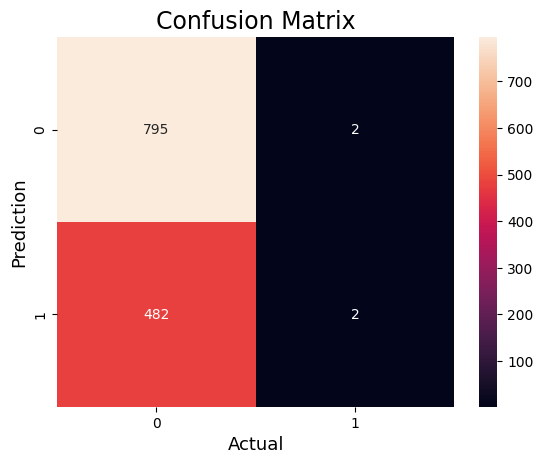

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [25]:
print(classification_report(y_test,y_pred,labels=[1]))

              precision    recall  f1-score   support

           1       0.50      0.00      0.01       484

   micro avg       0.50      0.00      0.01       484
   macro avg       0.50      0.00      0.01       484
weighted avg       0.50      0.00      0.01       484



In [31]:
# Here, I used the raw (unscaled numerical data) numerical data for prediction in LOGISTIC REGRESSION algorithm. 
# Accuracy of the model is 61%.
# But the False Negative value is 2.


In [26]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
Classifier= RandomForestClassifier(n_estimators= 100, criterion= "entropy")
Classifier.fit(x_train,y_train)
y_pred1=Classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred1)
print(acc*100)

C:\Users\dhana\AppData\Local\Temp\ipykernel_19996\3690713137.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Classifier.fit(x_train,y_train)


100.0


In [27]:
ps1=precision_score(y_test,y_pred1)
ps1

1.0

In [28]:
rc1=recall_score(y_test,y_pred1)
rc1

1.0

In [29]:
cm1=confusion_matrix(y_test,y_pred1)
cm1

array([[797,   0],
       [  0, 484]], dtype=int64)

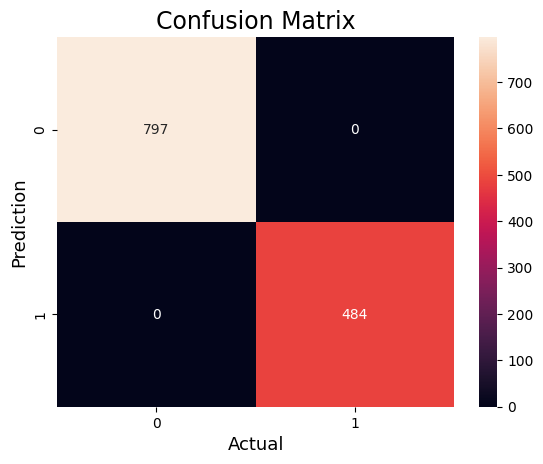

In [30]:
sns.heatmap(cm1,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [31]:
print(classification_report(y_test,y_pred1,labels=[1]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       484

   micro avg       1.00      1.00      1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



In [38]:
# Using unscaled numerical data in RANDOM FOREST algorithm.
# The ACCURACY is 97%
# But False Negative value is 12.

In [32]:
#DECISION TREE ALGORITHM
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1)
dtree.fit(x_train,y_train)
y_pred2=dtree.predict(x_test)
acc2=accuracy_score(y_test,y_pred2)
print(acc2*100)

100.0


In [33]:
ps2=precision_score(y_test,y_pred2)
ps2

1.0

In [34]:
rc2=recall_score(y_test,y_pred2)
rc2

1.0

In [35]:
cm2=confusion_matrix(y_test,y_pred2)
cm2

array([[797,   0],
       [  0, 484]], dtype=int64)

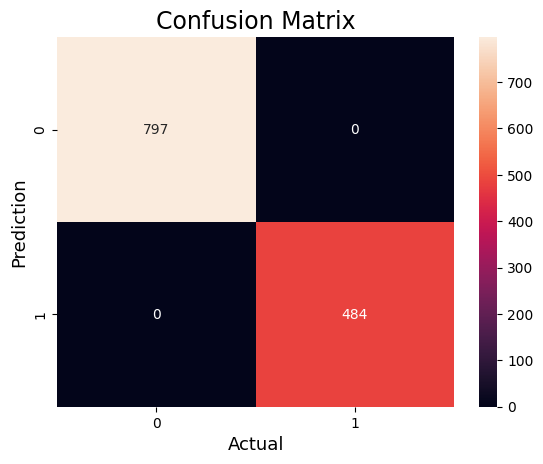

In [36]:
sns.heatmap(cm2,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [37]:
print(classification_report(y_test,y_pred2,labels=[1]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       484

   micro avg       1.00      1.00      1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



In [45]:
# Using unscaled numerical data in DECISION TREE algorithm.
# The ACCURACY is 97%.
# But the False Negative value is 30.

In [ ]:
# UNSCALED DATA CONCLUSION
# Here i've used LOGISTIC REGRESSION, RANDOM FOREST AND DECISION TREE algorithms 

    ALGORITHMS              ACC (%)     PS       RC     FN
------------------------------------------------------------
1) Logistic regression        61       0.7     0.009     2
2) Random forest              97      0.96      0.95    15
3) Decision tree             96.8     0.94      0.98    30

In [46]:
#   Conclusion, The model is more effective when using Random forest algorithm for prediciton 
#   and worst prediction in Logistic regrssion.

In [47]:
# SCALING THE DATA 

In [38]:
df1

,No_of_dependents,Education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [39]:
df_num=df1.select_dtypes(include=[int,float])
df_num

,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [40]:
df_cat=df1.select_dtypes(include=[object])
df_cat

,Education,self_employed,loan_status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected
...,...,...,...
4264,Graduate,Yes,Rejected
4265,Not Graduate,Yes,Approved
4266,Not Graduate,No,Rejected
4267,Not Graduate,No,Approved


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [52]:
# using MinMax Scaler 

In [42]:
mm=MinMaxScaler()
n=mm.fit_transform(df_num)
df_mm=pd.DataFrame(n,columns=df_num.columns)
df_mm

,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218
1,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490
2,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748
3,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415
4,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136
...,...,...,...,...,...,...,...,...,...
4264,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422
4265,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252
4266,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599
4267,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558


In [54]:
#sc=StandardScaler()
#c=sc.fit_transform(df_num)
#df_sc=pd.DataFrame(c,columns=df_num.columns)
#df_sc

In [55]:
# using Label encoding

In [43]:
label_encoder = preprocessing.LabelEncoder() 
df_cat['Education']= label_encoder.fit_transform(df_cat['Education'])
df_cat['Education'].unique()

array([0, 1])

In [44]:
label_encoder = preprocessing.LabelEncoder() 
df_cat['self_employed']= label_encoder.fit_transform(df_cat['self_employed'])
df_cat['self_employed'].unique()

array([0, 1])

In [45]:
label_encoder = preprocessing.LabelEncoder() 
df_cat['loan_status']= label_encoder.fit_transform(df_cat['loan_status'])
df_cat['loan_status'].unique()

array([0, 1])

In [46]:
df_cat

,Education,self_employed,loan_status
0,0,0,0
1,1,1,1
2,0,0,1
3,0,0,1
4,1,1,1
...,...,...,...
4264,0,1,1
4265,1,1,0
4266,1,0,1
4267,1,0,0


In [47]:
df_pre=pd.concat([df_mm,df_cat],axis=1)
df_pre

,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Education,self_employed,loan_status
0,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0,0,0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1,1,1
2,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0,0,1
3,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0,0,1
4,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,0,1,1
4265,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,1,1,0
4266,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,1,0,1
4267,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,1,0,0


In [48]:
x1=df_pre.iloc[:,:12]
x1

,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Education,self_employed,loan_status
0,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0,0,0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1,1,1
2,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0,0,1
3,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0,0,1
4,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,0,1,1
4265,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,1,1,0
4266,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,1,0,1
4267,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,1,0,0


In [49]:
y1=df_pre.iloc[:,[-1]]
y1

,loan_status
0,0
1,1
2,1
3,1
4,1
...,...
4264,1
4265,0
4266,1
4267,0


In [50]:
x_trainn,x_testt,y_trainn,y_testt=train_test_split(x1,y1,random_state=94,test_size=0.30,shuffle=True)

In [51]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
logregg = LogisticRegression(random_state=92)
logregg.fit(x_trainn,y_trainn)
y_predd=logregg.predict(x_testt)
ac=accuracy_score(y_testt,y_predd)
print(ac*100)

100.0


C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
pss=precision_score(y_testt,y_predd)
pss

1.0

In [53]:
rcc=recall_score(y_testt,y_predd)
rcc

1.0

In [54]:
cmm=confusion_matrix(y_testt,y_predd)
cmm

array([[817,   0],
       [  0, 464]], dtype=int64)

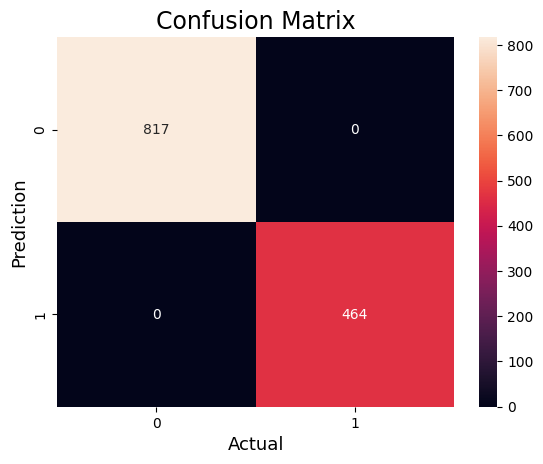

In [55]:
sns.heatmap(cmm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [56]:
print(classification_report(y_testt,y_predd,labels=[1]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       464

   micro avg       1.00      1.00      1.00       464
   macro avg       1.00      1.00      1.00       464
weighted avg       1.00      1.00      1.00       464



In [74]:
# using scaled numerical data in LOGISTIC REGRESSION algorithm
# The ACCURACY is 91%.
# The False Negative value is 56.

In [57]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
Classifierr= RandomForestClassifier(n_estimators= 100, criterion= "entropy")
Classifierr.fit(x_trainn,y_trainn)
y_predd1=Classifierr.predict(x_testt)
ac1=accuracy_score(y_testt,y_predd1)
print(ac1*100)

C:\Users\dhana\AppData\Local\Temp\ipykernel_19996\1593659072.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Classifierr.fit(x_trainn,y_trainn)


100.0


In [58]:
pcc1=precision_score(y_testt,y_predd1)
pcc1

1.0

In [59]:
rcc1=recall_score(y_testt,y_predd1)
rcc1

1.0

In [60]:
cmm1=confusion_matrix(y_testt,y_predd1)
cmm1

array([[817,   0],
       [  0, 464]], dtype=int64)

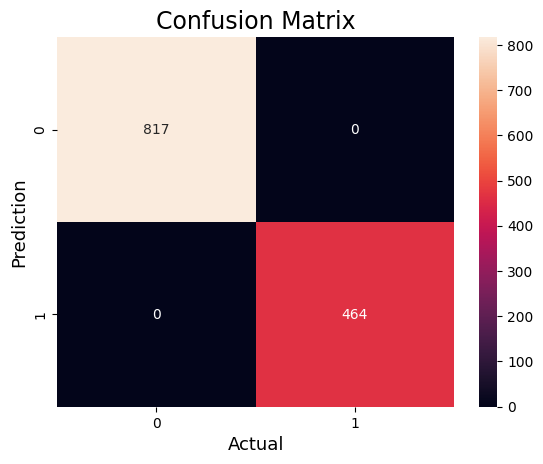

In [61]:
sns.heatmap(cmm1,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [62]:
print(classification_report(y_testt,y_predd1,labels=[1]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       464

   micro avg       1.00      1.00      1.00       464
   macro avg       1.00      1.00      1.00       464
weighted avg       1.00      1.00      1.00       464



In [63]:
#DECISION TREE ALGORITHM
from sklearn.tree import DecisionTreeClassifier
dtreee=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1)
dtreee.fit(x_trainn,y_trainn)
y_predd2=dtreee.predict(x_testt)
ac2=accuracy_score(y_testt,y_predd2)
print(ac2*100)

100.0


In [64]:
pss2=precision_score(y_testt,y_predd2)
pss2

1.0

In [65]:
rcc2=recall_score(y_testt,y_predd2)
rcc2

1.0

In [66]:
cmm2=confusion_matrix(y_testt,y_predd2)
cmm2

array([[817,   0],
       [  0, 464]], dtype=int64)

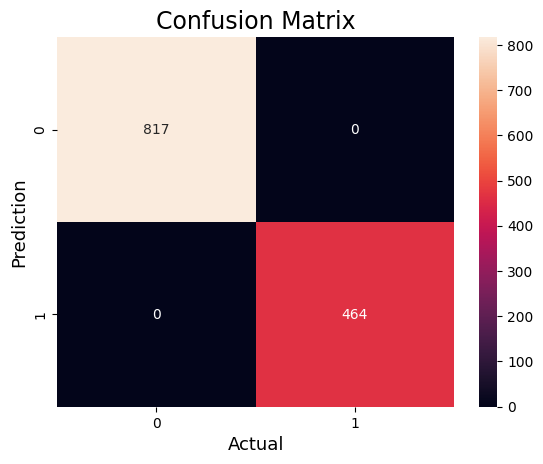

In [67]:
sns.heatmap(cmm2,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [68]:
print(classification_report(y_testt,y_predd2,labels=[1]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       464

   micro avg       1.00      1.00      1.00       464
   macro avg       1.00      1.00      1.00       464
weighted avg       1.00      1.00      1.00       464



In [ ]:
# SCALED DATA CONCLUSION
# Here i've used LOGISTIC REGRESSION, RANDOM FOREST AND DECISION TREE algorithms 

    ALGORITHMS              ACC (%)     PS       RC     FN
------------------------------------------------------------
1) Logistic regression       100        1        1      1
2) Random forest             100        1        1      1
3) Decision tree             100        1        1      1

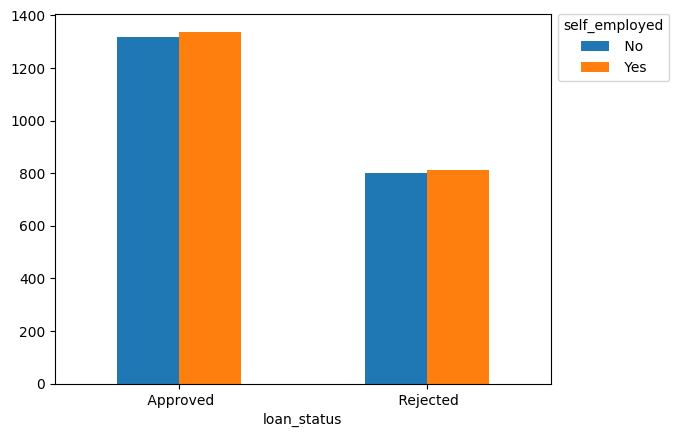

In [69]:
#Bar plot between annual income and loan amount
import matplotlib.pyplot as plt
crosstb = pd.crosstab(df1.loan_status,df1.self_employed)
barplot = crosstb.plot.bar(rot=0)
barplot.legend(title='self_employed', bbox_to_anchor=(1, 1.02), loc='upper left')

In [91]:
#The Above Plot shows the relation between self employed & Loan Status 

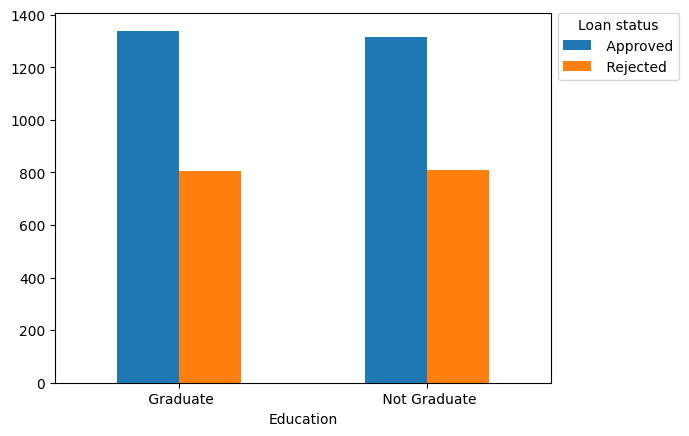

In [70]:
crosstb1 = pd.crosstab(df1.Education,df1.loan_status)
barplot1 = crosstb1.plot.bar(rot=0)
barplot1.legend(title='Loan status', bbox_to_anchor=(1, 1.02), loc='upper left')

In [93]:
#This above plot shows the relation between education and loan status

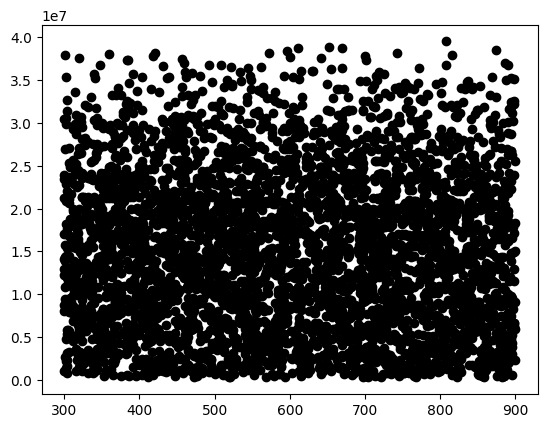

In [72]:
#Scatter plot for cibil_score and loan_amount
plt.scatter(df1['cibil_score'], df1['loan_amount'], c ="black")
plt.show()

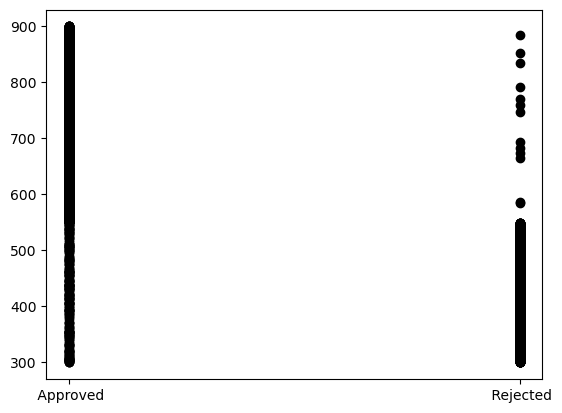

In [95]:
#Scatter plot for loan_status and cibil_score
plt.scatter(df1['loan_status'], df1['cibil_score'], c ="black")
plt.show()

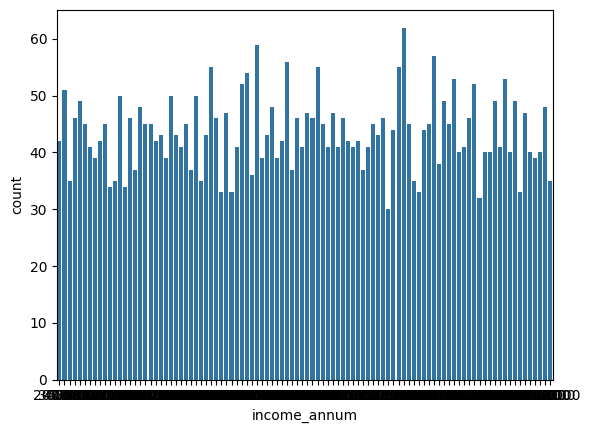

In [73]:
#Count plot for annual income column
sns.countplot(x ='income_annum', data = df1)
plt.show()

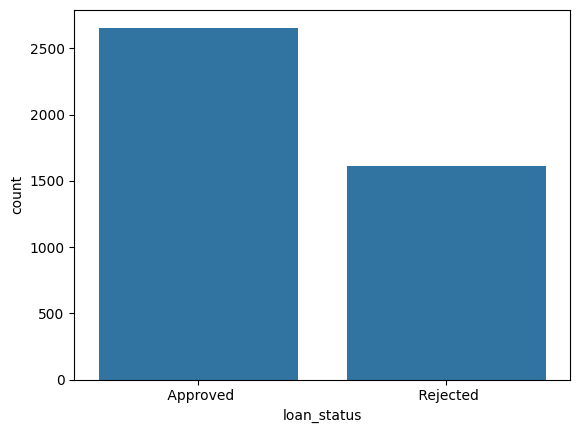

In [74]:
#Count plot for loan status column
sns.countplot(x ='loan_status', data = df1)
plt.show()

In [2]:
#plot
#rocauc curverAUC ROC stands for “Area Under the Curve” of the “Receiver Operating Characteristic” curve. 
#The AUC ROC curve is basically a way of measuring the performance of an ML model

In [102]:
# ROC AUC SCORE FOR UNSCALED DATA
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")
#this is for Logistic regression

ROC AUC: 0.5037


In [101]:
score = roc_auc_score(y_test, y_pred1)
print(f"ROC AUC: {score:.4f}")
#this is for RANDOM FOREST ALGORITHM

ROC AUC: 0.9694


In [103]:
score = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC: {score:.4f}")
#this is for DECISION TREE ALGORITHM

ROC AUC: 0.9708


In [104]:
# ROC AUC SCORE FOR SCALED DATA
score = roc_auc_score(y_testt, y_predd)
print(f"ROC AUC: {score:.4f}")
#this is for Logistic regression

ROC AUC: 0.9043


In [106]:
score = roc_auc_score(y_testt, y_predd1)
print(f"ROC AUC: {score:.4f}")
#this is for RANDOM FOREST ALGORITHM

ROC AUC: 0.9759


In [107]:
score = roc_auc_score(y_testt, y_predd2)
print(f"ROC AUC: {score:.4f}")
#this is for DECISION TREE ALGORITHM

ROC AUC: 0.9709


In [108]:
# CONCLUSION
# BASED ON THE ROC AND AUC CURVE, RANDOM FOREST ALGORITHM IS MORE EFFECTIVE FOR THIS DATASET.